In [1]:
cd ../

/Users/ian.huang/Documents/Projects/hyperbolics_APMA


In [2]:
import matplotlib.pyplot as plt
import src.sarkars
import networkx as nx
import numpy as np


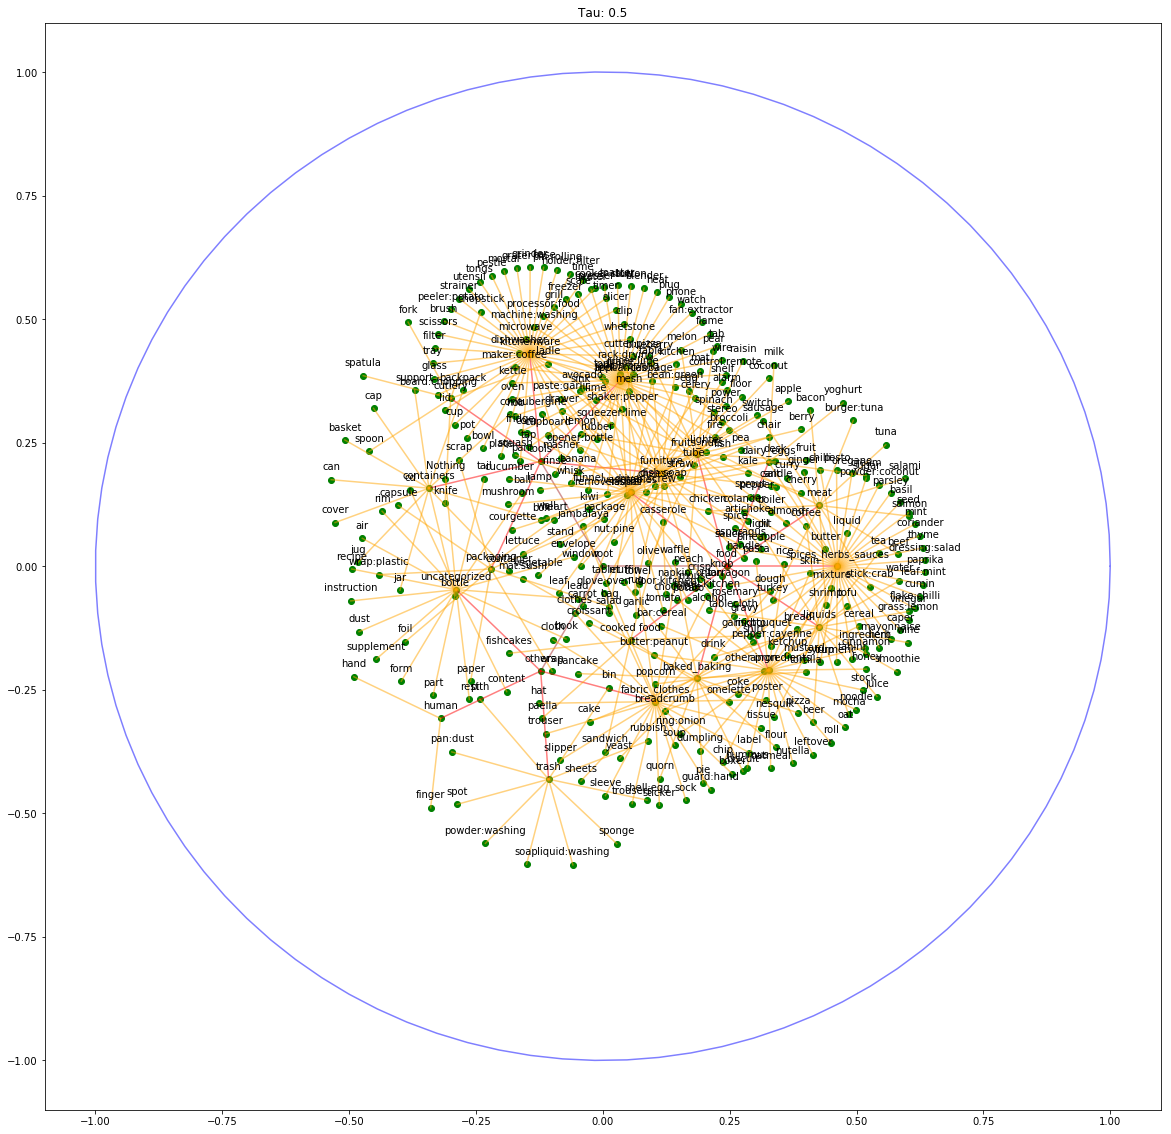

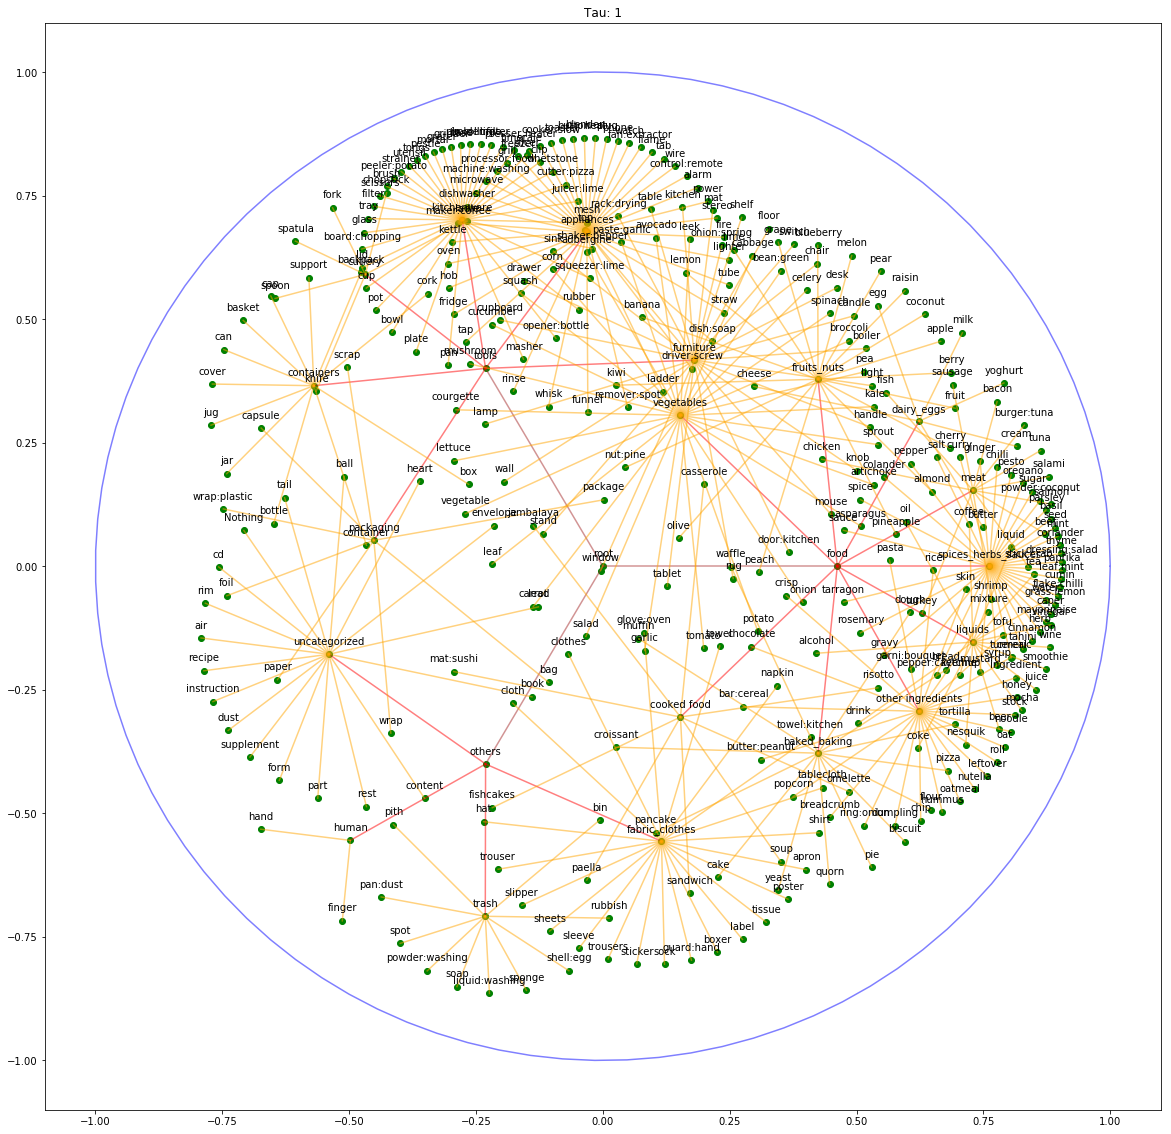

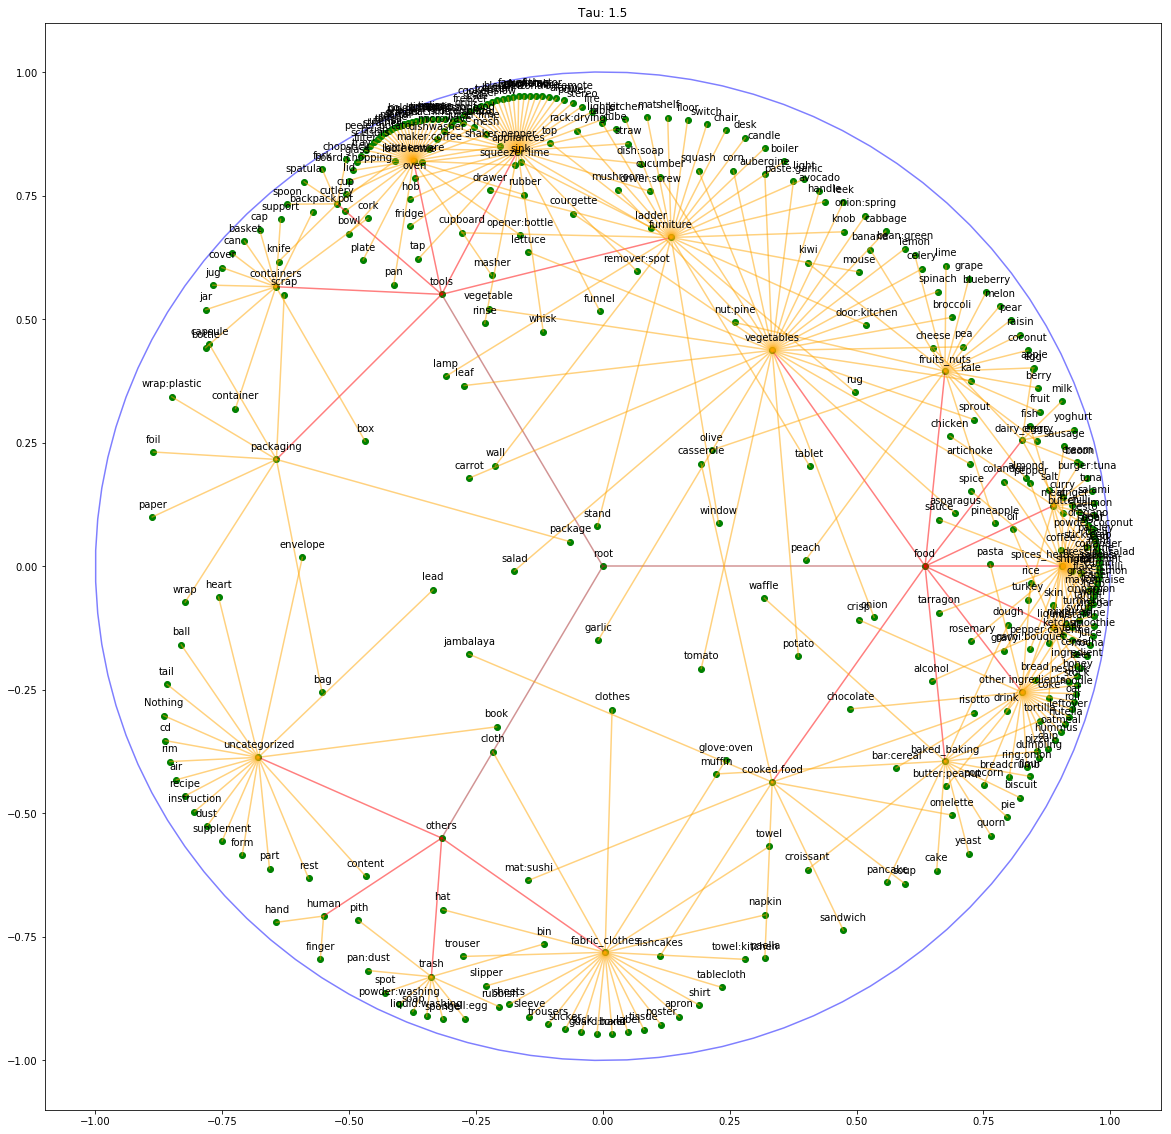

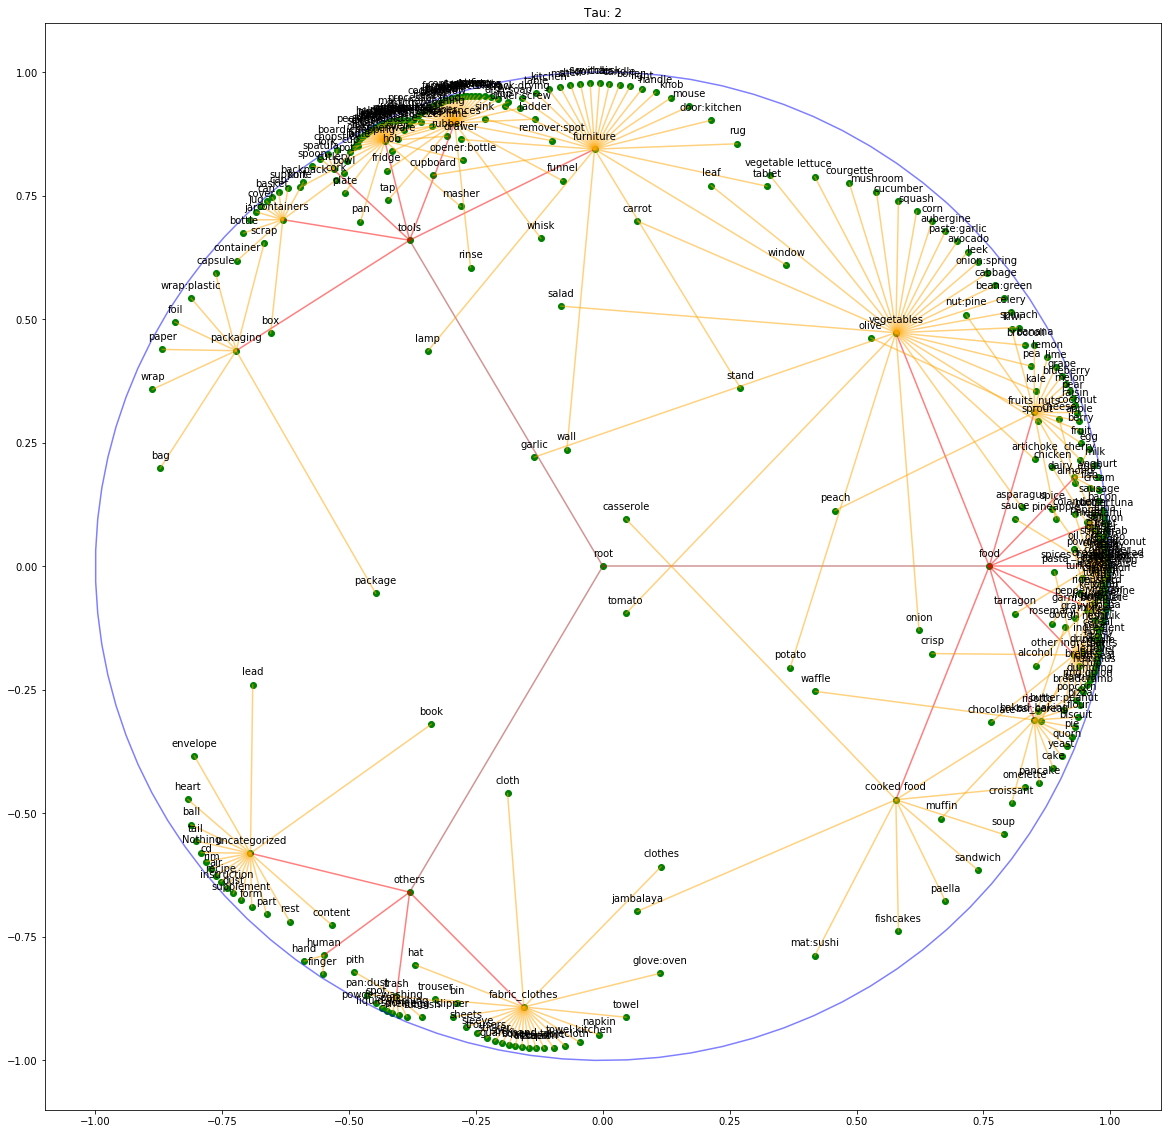

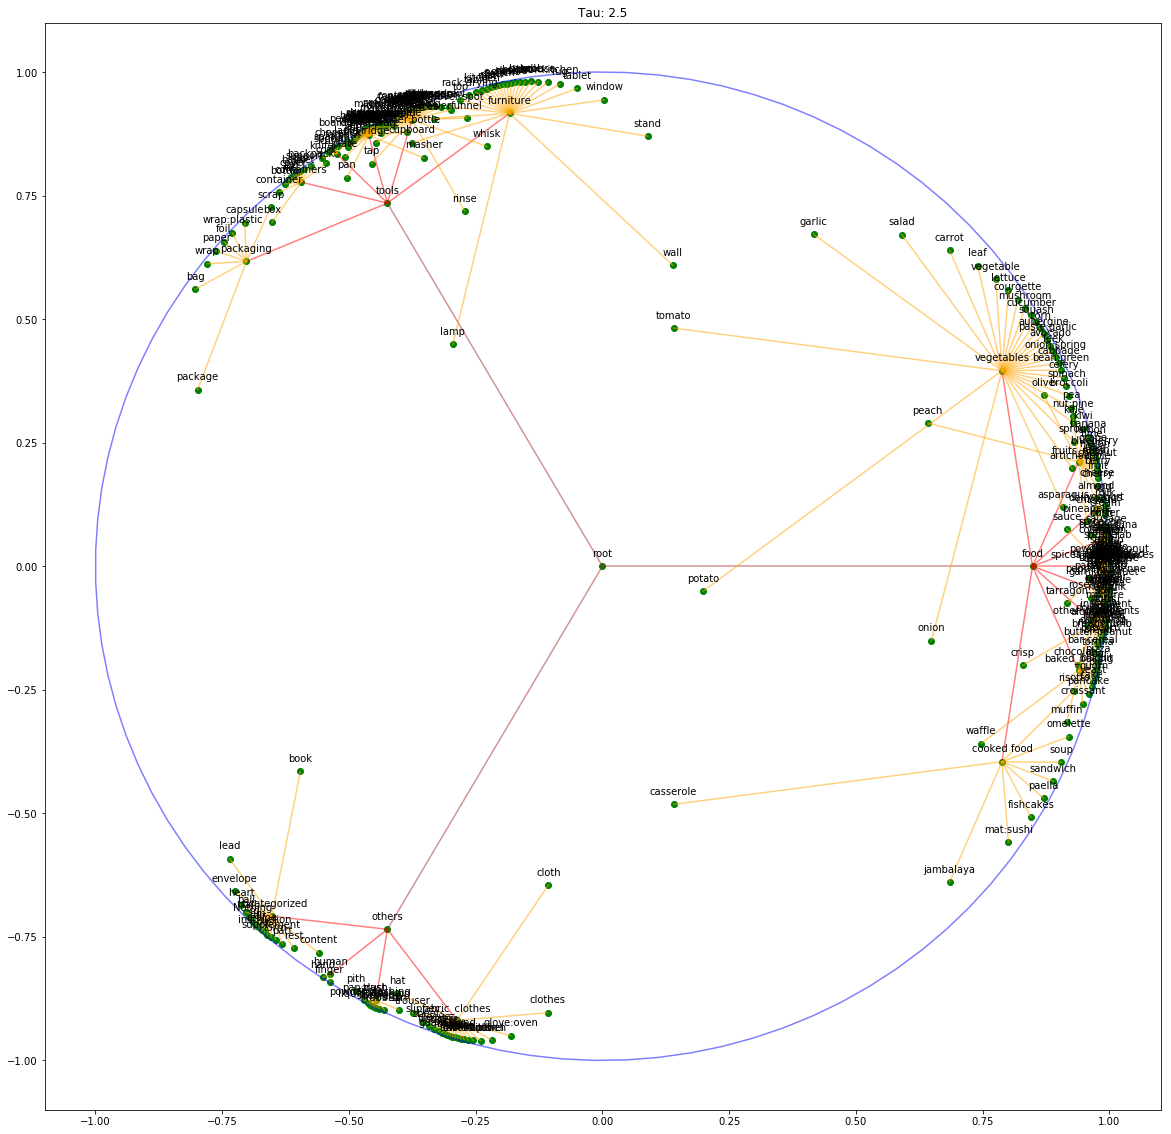

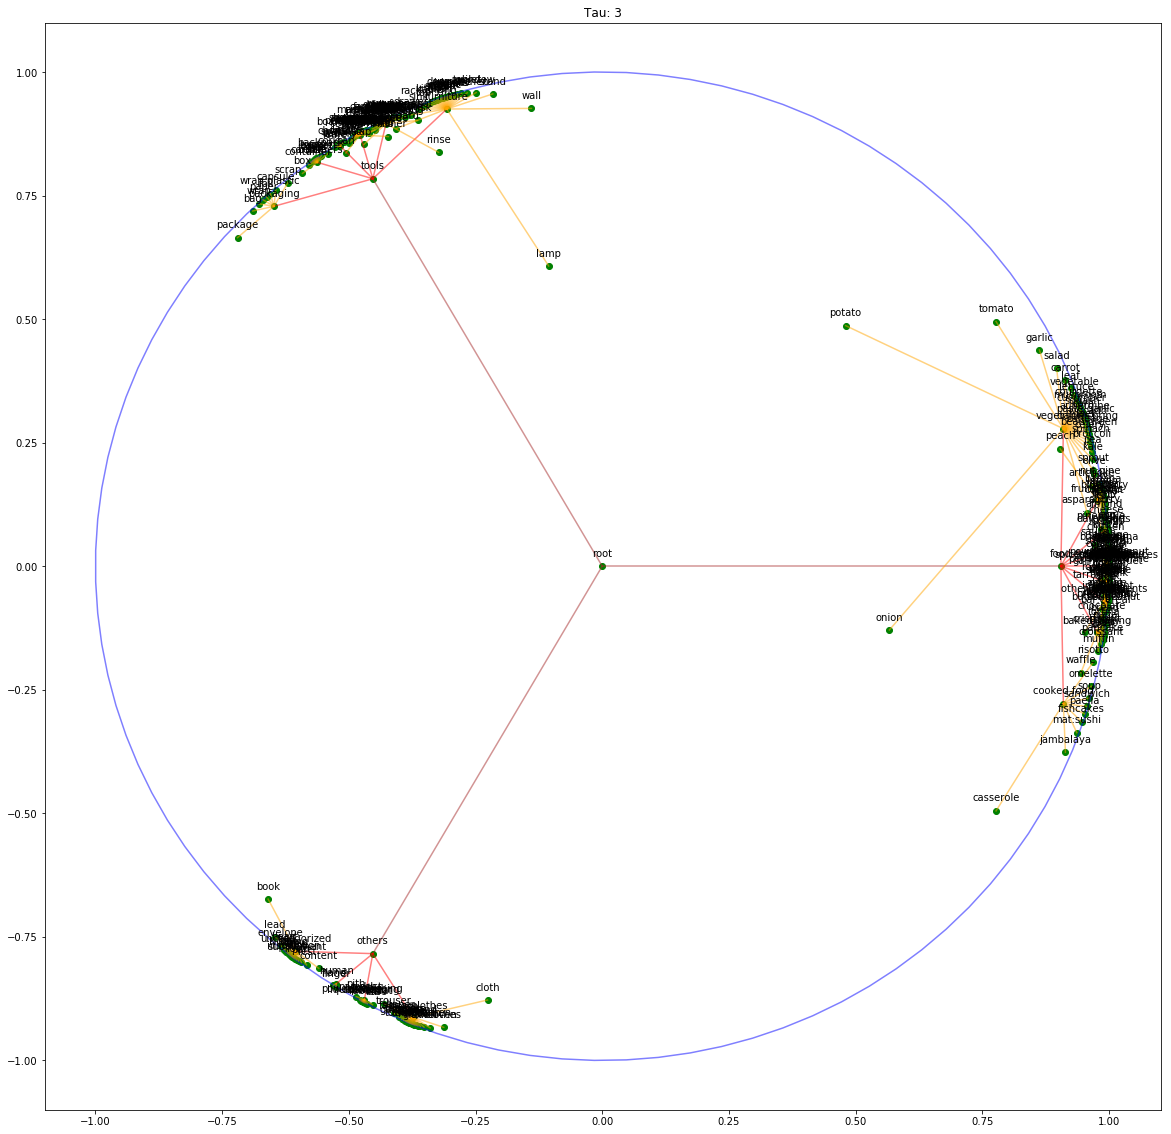

In [25]:
for tau in [0.5,1,1.5,2,2.5,3]:
    embeddings, keys, G_BFS = src.sarkars.run_hyperbolics('data/hierarchyV1.json', tau=tau)
    
    plt.figure(figsize=(20,20))
    plt.title('Tau: {}'.format(tau))
    
    plt.scatter(embeddings[:,0], embeddings[:,1], color='green')
    for node in G_BFS.nodes():
        x, y = embeddings[keys[node]]
        plt.annotate(node, (x,y), textcoords='offset points', xytext=(0,10), ha='center')
        
    background_circle_x = np.cos(np.linspace(0, 2*np.pi, 100))
    background_circle_y = np.sin(np.linspace(0, 2*np.pi, 100))
    plt.plot(background_circle_x, background_circle_y, color = 'blue', alpha=0.5)

    for element in G_BFS.edges():
        from_ = element[0]
        to_ = element[1]
        xs = [embeddings[keys[from_], 0], embeddings[keys[to_], 0]]
        ys = [embeddings[keys[from_], 1], embeddings[keys[to_], 1]]

        depth = nx.shortest_path_length(G_BFS, 'root', from_)
        if depth == 0:
            color = 'brown'
        elif depth==1:
            color = 'red' 
        elif depth==2:
            color = 'orange'

        plt.plot(xs, ys, color=color, alpha=0.5)
    